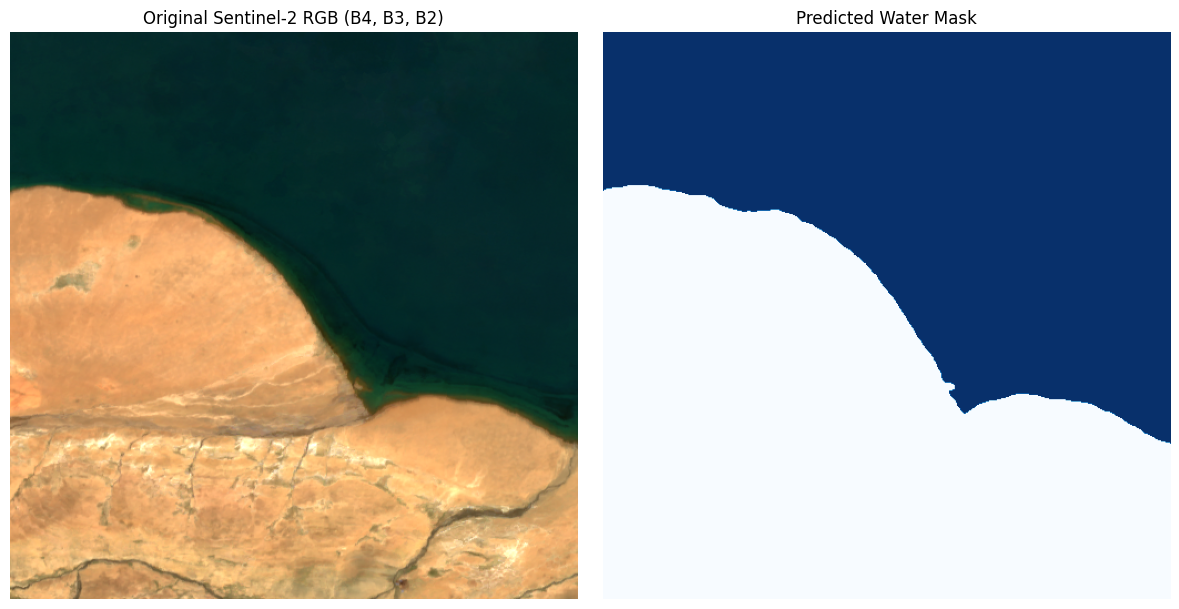

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# ---------- Paths ----------
image_path = "./example/img.tif"     
pred_path = "./results/pred.tif"

# ---------- Read original image for RGB ----------
with rasterio.open(image_path) as src:
    # B2, B3, B4
    b2 = src.read(1).astype(np.float32)
    b3 = src.read(2).astype(np.float32)
    b4 = src.read(3).astype(np.float32)

rgb = np.stack([b4, b3, b2], axis=-1)
rgb = rgb / (np.percentile(rgb, 98) + 1e-6)
rgb = np.clip(rgb, 0, 1)

# ---------- Read predicted water mask ----------
with rasterio.open(pred_path) as src:
    pred = src.read(1)

# ---------- Visualization ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(rgb)
axes[0].set_title("Original Sentinel-2 RGB (B4, B3, B2)")
axes[0].axis("off")

axes[1].imshow(pred, cmap='Blues')  # 0=background, 1=water
axes[1].set_title("Predicted Water Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# ---------- Save figure ----------
# fig.savefig("prediction_visualization.png", dpi=300)
# print("Saved visualization to prediction_visualization.png")